# Relax, Inc. Takehome Challenge

Relax, Inc. makes productivity and project management software that's popular with both individuals and teams. My task is to determine which factors predict future user adoption. A user is considered adopted if they have logged into the product on 3 separate days in at least one 7-day period. I will identify any factors that are important in determining whether or not a user becomes an adopted user, and any further research or additional data that may be helpful.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [2]:
users_path = "../Relax_Takehome_Challenge/takehome_users.csv"

In [3]:
#import data
users = pd.read_csv(users_path, encoding = "ISO-8859-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users['last_session_creation_time'] = pd.to_datetime(users.last_session_creation_time, unit='s')
users['creation_time'] = pd.to_datetime(users.creation_time)

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
#let's view a selection of rows that are missing data in the last_session_creation_time col
users.query('`last_session_creation_time`.isnull()', engine='python').head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN
17,18,2013-08-24 00:26:46,Gregersen Celina,CelinaAGregersen@jourrapide.com,GUEST_INVITE,NaT,0,0,2,3153.0
25,26,2013-07-28 00:53:32,Wexler Florian,FlorianWexler@jourrapide.com,ORG_INVITE,NaT,0,0,56,11857.0
31,32,2013-04-17 16:21:30,Perez Timothy,TimothyJPerez@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,98,NaN
33,34,2014-02-03 20:55:18,Holm Sara,SaraMHolm@hotmail.com,ORG_INVITE,NaT,0,0,33,3721.0
34,35,2013-08-01 10:55:26,Krueger Dieter,DieterKrueger@gustr.com,PERSONAL_PROJECTS,NaT,0,0,59,NaN


It seems rows with missing 'last_session_creation_time' are users who have not logged in since they signed up. I will assume this is true and accordingly I will fill these missing values with the signup timestamp. For the missing 'invited_by_user_id' info, I will fill these with 0, because there is no user_id of zero, so a zero in this column will be a stand-in for 'not invited by another user'.

In [7]:
users['last_session_creation_time']= users['last_session_creation_time'].fillna(users['creation_time'])
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
users['invited_by_user_id'] = users['invited_by_user_id'].astype('int64')

In [9]:
#outpath = Path('../Relax_Takehome_Challenge/users_clean.csv')

#users.to_csv(outpath, index=False)

### Determine which users are considered adopted users

In [10]:
engagement_path = "../Relax_Takehome_Challenge/takehome_user_engagement.csv"

In [11]:

#engagement = pd.read_csv(engagement_path, index_col='time_stamp', parse_dates=True)
engagement = pd.read_csv(engagement_path)

engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'], infer_datetime_format=True)
display(engagement.info(), engagement.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


None

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


We need to determine which users are considered 'adopted' users (ie those users who have logged in at least 3 separate days in at least one seven day period:

In [12]:
# get a count grouped by user id of logins in rolling 7-day period

def get_logins(grouping, frequency):
    return grouping.rolling(frequency, on = 'time_stamp')['user_id'].count()

engagement['7_day_logins'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(get_logins, '7D')


In [13]:
engagement.head()

,time_stamp,user_id,visited,7_day_logins
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [14]:
#From the new column with logins per rolling 7 days, determine which users have a row with >= 3 in '7_day_logins'

adopted = []

for i in engagement.index:
    if engagement['7_day_logins'][i] >= 3:
        if engagement['user_id'][i] not in adopted:
            adopted.append(engagement['user_id'][i])
            
# returns list with user ID's of adopted users

In [15]:
len(adopted)

1602

Now that I have a list of the ID's of adopted users, I will use this to create a new column in the users table with a 1 for adopted and a 0 for not adopted.

In [16]:
adopted_users = []

for i in users['object_id']:
    if i in adopted:
        adopted_users.append(1)
    else:
        adopted_users.append(0)

In [17]:
len(adopted_users)

12000

In [18]:
users['adopted'] = adopted_users
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [19]:
users['adopted'].value_counts()

0    10398
1     1602
Name: adopted, dtype: int64

In [20]:
print(f'Adopted users make up {1602/12000:.2f}% of users.')

Adopted users make up 0.13% of users.


We can also engineer a feature that is the number of days between account creation and a user's last session. This is a rudimentary measure of how long the user has been using the product (but without saying anythiong about how often they use the product).

In [21]:
#compute days between signup and last login
days_bw = users.last_session_creation_time - users.creation_time	

users['days_used'] = days_bw.dt.days


In [22]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,days_used
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,5


### Preprocessing

In [23]:
#import modeling and preprocessing tools

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
display(len(users.invited_by_user_id.unique()), len(users.org_id.unique()))

2565

417

With 2565 and 417 unique values, respectively, 'invited_by_user_id' and 'org_id' are not likely to be very helpful for modeling. If there were fewer unique values, I could one-hot encode them as categorical variables, as it could be possible for a handful of users to be 'super-influencers' who invite a lot of new users, but this doesn't seem to be the case here. So I will drop these columns. I will also drop object_id, creation_time, name, email, and last_session_creation_time,
as these features will not be suitable for modeling.

In [25]:
# drop columns not needed for modeling

users = users.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time',
                    'org_id', 'invited_by_user_id'], axis=1)

users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,days_used
0,GUEST_INVITE,1,0,0,0
1,ORG_INVITE,0,0,1,136
2,ORG_INVITE,0,0,0,0
3,GUEST_INVITE,0,0,0,1
4,GUEST_INVITE,0,0,0,5


In [26]:
X = users.drop(columns=['adopted'])
y = users[['adopted']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=47, stratify = y)

In [27]:
scaler=StandardScaler()
cols_to_scale = ['days_used']
Xtrain[cols_to_scale] = scaler.fit_transform(Xtrain[cols_to_scale])
Xtest[cols_to_scale] = scaler.transform(Xtest[cols_to_scale])

In [28]:
#one-hot encode the creation_source column

cat_cols=['creation_source']
Xtrain_cat = Xtrain[['creation_source']]
Xtest_cat = Xtest[['creation_source']]

encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

encoder.fit(Xtrain_cat)
Xtrain.drop(columns = cat_cols, inplace=True)
Xtrain_cat = pd.DataFrame(encoder.transform(Xtrain_cat), index = Xtrain.index, 
                           columns = encoder.get_feature_names_out()).astype(int)
Xtrain = Xtrain.join(Xtrain_cat, how ='outer')

encoder.fit(Xtest_cat)
Xtest.drop(columns = cat_cols, inplace=True)
Xtest_cat = pd.DataFrame(encoder.transform(Xtest_cat), index = Xtest.index, 
                           columns = encoder.get_feature_names_out()).astype(int)
Xtest = Xtest.join(Xtest_cat, how ='outer')

display(Xtrain.head(3), Xtest.head(3), ytrain.head(3), ytest.head(3))

C:\Users\ehard\anaconda3\envs\relax_takehome\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ehard\anaconda3\envs\relax_takehome\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,opted_in_to_mailing_list,enabled_for_marketing_drip,days_used,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
2098,0,0,-0.345505,1,0,0,0
3029,0,0,-0.345505,0,0,1,0
7120,0,0,-0.321910,0,1,0,0


,opted_in_to_mailing_list,enabled_for_marketing_drip,days_used,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
9630,0,0,-0.345505,0,0,1,0
8840,0,0,-0.345505,1,0,0,0
7022,0,0,5.301446,1,0,0,0


,adopted
2098,0
3029,0
7120,0


,adopted
9630,0
8840,0
7022,1


### Modeling:

In [29]:
#Logistic Regression Classifier

clf = LogisticRegression(solver = 'newton-cg', max_iter = 500, class_weight='balanced', random_state = 47)

In [30]:
# fit the classifier

clf.fit(Xtrain, ytrain.values.ravel()) 

LogisticRegression(class_weight='balanced', max_iter=500, random_state=47,
                   solver='newton-cg')

In [31]:
# predict on training and test sets

y_pred_train = clf.predict(Xtrain)

y_pred_test = clf.predict(Xtest)

In [32]:
#display train and test accuracy

print('Training Data Accuracy Score:', f'{accuracy_score(y_pred_train, ytrain):.2f}')
print('Test Data Accuracy Score:', f'{accuracy_score(y_pred_test, ytest):.2f}')
       

Training Data Accuracy Score: 0.97
Test Data Accuracy Score: 0.96


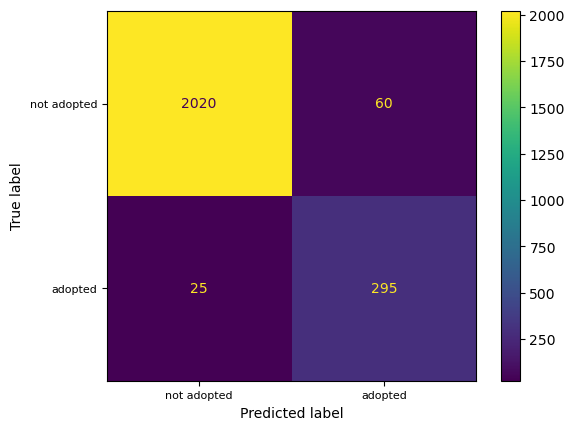

In [36]:
# let's look at the confusion matrix for the LR model:
cm = confusion_matrix(ytest, y_pred_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not adopted', 'adopted'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not adopted', 'adopted'], fontsize = 8)
ax.set_yticklabels(labels = ['not adopted', 'adopted'], fontsize = 8)
display_cm.plot(ax = ax)

The model is about 83% accurate in predicting a positive (adopted). For a very imbalanced dataset, that is not too bad.

### Feature Importances

In [34]:
#get coefficients for Logistic Regression model
coefficients = np.exp(clf.coef_[0])
feature_names = clf.feature_names_in_
print(coefficients, feature_names)

[1.35609640e+00 7.99150574e-01 1.67720334e+04 1.01955636e+00
 6.08016223e-01 8.49315100e-01 1.34512779e+00] ['opted_in_to_mailing_list' 'enabled_for_marketing_drip' 'days_used'
 'creation_source_ORG_INVITE' 'creation_source_PERSONAL_PROJECTS'
 'creation_source_SIGNUP' 'creation_source_SIGNUP_GOOGLE_AUTH']


In [35]:
pd.DataFrame(coefficients, feature_names, columns=['coefficients']).sort_values(by='coefficients', ascending=False)


,coefficients
days_used,16772.033393
opted_in_to_mailing_list,1.356096
creation_source_SIGNUP_GOOGLE_AUTH,1.345128
creation_source_ORG_INVITE,1.019556
creation_source_SIGNUP,0.849315
enabled_for_marketing_drip,0.799151
creation_source_PERSONAL_PROJECTS,0.608016


# Findings and Conclusions

The days between a user's signup and their last login is by far the most important feature for predicting a user's adoption. Generally, a user is not going to sign up, then not use the product for months, and then use it once, so a high value for days between signup and last use is generally indicative that a user uses the product regularly. This feature is so much more important than any others in creating adoption. One possible strategy to use this information would be to send emails daily or weekly to a user who has signed up but not yet logged in to use the product (or not logged in often), reminding the user to use the product and providing examples of how to use it, testimonials from adopted users, and stats on how the product can increase productivity. 